In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
# 统计信息：模型名，成功数、失败数、成功率、时间
summary = []

In [2]:
# 使用matplotlib 绘图
# plt.rcParams['font.sans-serif'] = ['Droid Sans Fallback']
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # macos
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8.0, 6.0)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

In [3]:
data, prompt = utils.load_data() # dataframe
# print data first row first col value
print(data.iloc[0,0])
user_input = f"{prompt}\n\nUser: {data.iloc[0,0]}"
# user_input = f"User: {data.iloc[0,0]}"

```json 
 {"product": "Apple", "price": 1.20, "stock": 100}
 ```


In [4]:
import Qwen
success, fail, success_rate, time_cost = utils.cacluate_vaild(Qwen.chat, user_input)
summary.append(['Qwen', success, fail, success_rate, time_cost])
Qwen.unload()

2024-01-10 10:30:41,537 - modelscope - INFO - PyTorch version 2.1.0 Found.
2024-01-10 10:30:41,540 - modelscope - INFO - Loading ast index from /home/shf/.cache/modelscope/ast_indexer
2024-01-10 10:30:41,571 - modelscope - INFO - Loading done! Current index file version is 1.10.0, with md5 a5736d6ff4fe529ad0cdd0a6781f9674 and a total number of 946 components indexed
/home/shf/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-10 10:30:45,041 - modelscope - WARNING - Using the master branch is fragile, please use it with caution!
2024-01-10 10:30:45,042 - modelscope - INFO - Use user-specified model revision: master
2024-01-10 10:30:46,447 - modelscope - WARNING - Using the master branch is fragile, please use it with caution!
2024-01-10 10:30:46,449 - modelscope - INFO - Use user-

vailed_json: 10
invailed_json: 0
vailed_json: 1.0
time_cost: 28.125986576080322


In [6]:
import Baichuan7B
success, fail, success_rate, time_cost = utils.cacluate_vaild(Baichuan7B.chat, user_input)
summary.append(['Baichuan7B', success, fail, success_rate, time_cost])

2024-01-10 10:31:40,930 - modelscope - INFO - Use user-specified model revision: v1.0.4
Loading checkpoint shards: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]


vailed_json: 10
invailed_json: 0
vailed_json: 1.0
time_cost: 72.78519082069397


In [8]:
import Pangu2_6B
success, fail, success_rate, time_cost = utils.cacluate_vaild(Pangu2_6B.chat, user_input)
summary.append(['Pangu', success, fail, success_rate, time_cost])

2024-01-10 10:03:37,078 - modelscope - WARNING - Model revision not specified, use revision: v1.0.3
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
2024-01-10 10:03:40,074 - modelscope - WARNING - Model revision not specified, use revision: v1.0.3
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built successfully.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:9 for open-end generation.
/home/shf/.conda/envs/py310/lib/python3.10/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/home

IndexError: index out of range in self

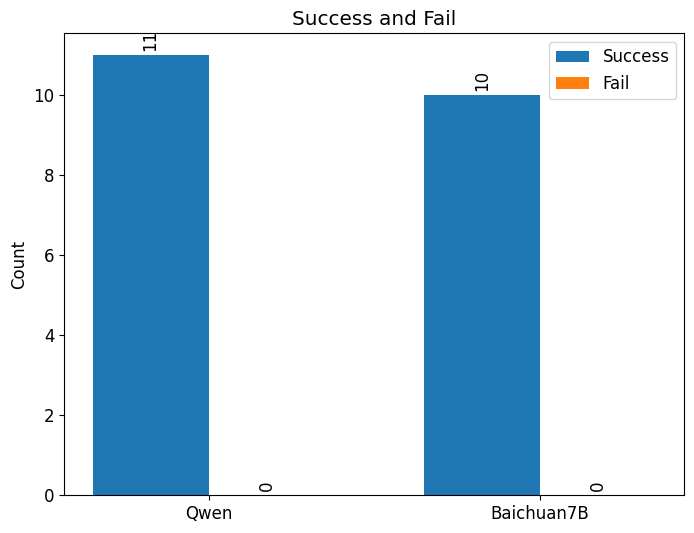

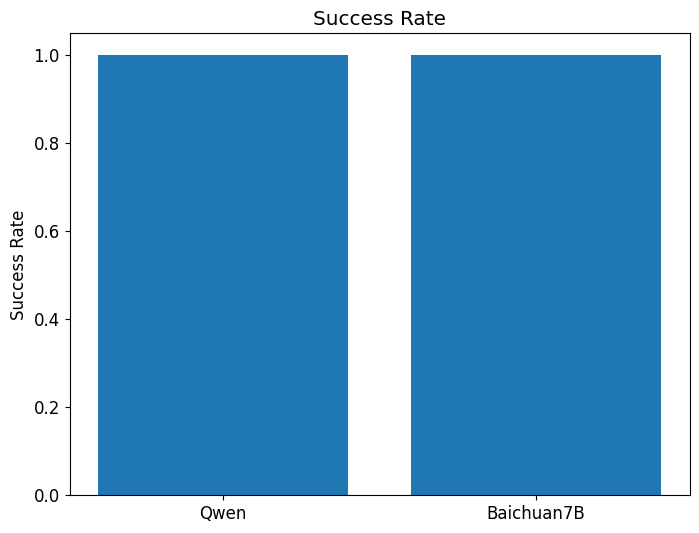

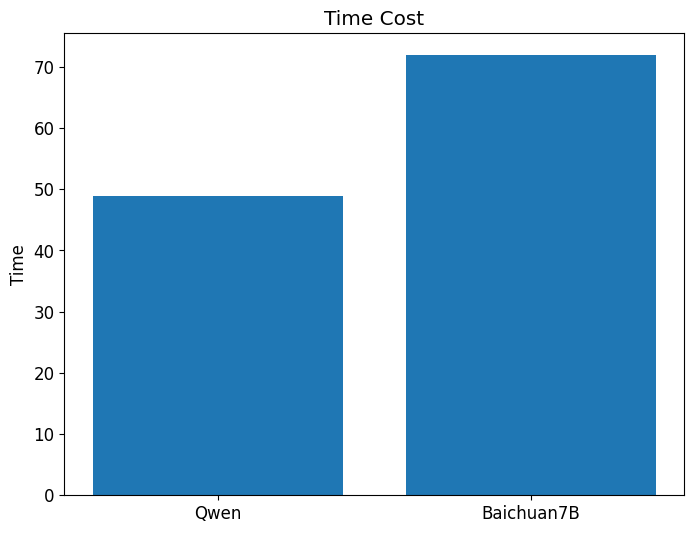

In [6]:
# 绘制条形图，通过summary信息，比较两个模型的成功数、失败数、成功率、时间

# 成功数、失败数
x = np.arange(len(summary))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [s[1] for s in summary], width, label='Success')
rects2 = ax.bar(x + width/2, [s[2] for s in summary], width, label='Fail')

ax.set_ylabel('Count')
ax.set_title('Success and Fail')
ax.set_xticks(x)
ax.set_xticklabels([s[0] for s in summary])
ax.legend()

autolabel(rects1)
autolabel(rects2)

# 成功率
fig, ax = plt.subplots()
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate')
ax.set_xticks(x)
ax.set_xticklabels([s[0] for s in summary])
ax.bar(x, [s[3] for s in summary])

# 时间
fig, ax = plt.subplots()
ax.set_ylabel('Time')
ax.set_title('Time Cost')
ax.set_xticks(x)
ax.set_xticklabels([s[0] for s in summary])
ax.bar(x, [s[4] for s in summary])

plt.show()



